# Exploratory Data Analysis of the 2014 New York City 311 Call Data
#### The aim of this EDA is to understand the NYC 311 call data and observe any noticible trends that we can make predictions on.
Author: Ikponmwosa Felix Ogbeide

<h2>Questions to answer through this project</h2>
<br>
<li>Which boroughs have the most call incidents</li>
<li>Which agency gets the most incidents</li>
<li>What borough has the fastest incident resolution time</li>
<li>How does the incidents vary month to month</li>
<br>

<p>
<strong>PS</strong>
<br>
<em>I'm also on the lookout for interesting trends and observations beyond the questions above!</em>
</p>

<hr>
Before I begin exploring the data, it is essential to understand what type of data I am working with. This would enable me decide on what kind data cleaning or wrangling is necessary for this project

In [1]:
# Import python libraries data manipulation
import numpy as np
import pandas as pd

In [2]:
# Read 311 data from xls file into pandas dataframe
datafile = '311_Service_Requests_from_2014.csv'
df = pd.read_csv(datafile)
df.head(3)

C:\Users\Ikp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8,17,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,28457271,07/11/2014 03:08:58 PM,08/05/2014 12:41:37 PM,DOT,Department of Transportation,Sidewalk Condition,Defacement,Sidewalk,11368,37-73 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.751870,-73.862718,"(40.75187005911849, -73.8627181241703)"
1,28644314,08/08/2014 02:06:22 PM,08/12/2014 11:33:34 AM,DCA,Department of Consumer Affairs,Consumer Complaint,False Advertising,NaN,10014,113 WASHINGTON PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732623,-74.001119,"(40.732623326327484, -74.0011185474772)"
2,29306886,11/18/2014 12:52:40 AM,11/18/2014 01:35:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11358,42-10 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760384,-73.806826,"(40.76038370367052, -73.80682559743896)"


In [3]:
# Setting pandas maximum colummns display so as to view all columns at once.
pd.set_option('display.max_columns', None)  

In [4]:
# Since the datafile has a Unique Key column its better to have that as the index
# Re-read datafile into df pandas dataframe setting unique key as index
df = pd.read_csv(datafile, index_col='Unique Key')

C:\Users\Ikp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8,17,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ikp\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)



#### From warning, we know we have mixed types in some columns. Its best to investigate what the mixtypes are.

In [5]:
# I'll create a list to store the data with mixed data types.
# Later on in the project, I'll visit this list of mixed data types
df_mixed_dt = [df.columns[7], df.columns[16], df.columns[39],df.columns[40],df.columns[41],df.columns[42],
               df.columns[43], df.columns[44], df.columns[45],df.columns[46], df.columns[47], df.columns[48]]

In [6]:
# View object types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099056 entries, 28457271 to 29607189
Data columns (total 52 columns):
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Description            object
Resolution Action 

In [7]:
# Count of non-null values for every column 
df_columns = list(df.columns)
df[df_columns].count()

Created Date                      2099056
Closed Date                       2053916
Agency                            2099056
Agency Name                       2099056
Complaint Type                    2099056
Descriptor                        2086658
Location Type                     1546759
Incident Zip                      1952035
Incident Address                  1641505
Street Name                       1641401
Cross Street 1                    1675745
Cross Street 2                    1668168
Intersection Street 1              323622
Intersection Street 2              323523
Address Type                      1994598
City                              1953071
Landmark                              810
Facility Type                      536769
Status                            2099053
Due Date                           870518
Resolution Description            2085477
Resolution Action Updated Date    2060578
Community Board                   2099056
Borough                           

#### Columns with a lot of missing data won't be useful to my analysis. Also, some columns in the data aren't just useful to this analysis, its best to remove these columns 

In [8]:
# A list of columns to remove from the dataframe
df_cols_rmv = ['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
               'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type',
               'Due Date', 'Resolution Description','Community Board', 'X Coordinate (State Plane)',
               'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name',
               'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address',
               'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint',
               'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
               'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name',
               'Ferry Direction', 'Ferry Terminal Name', 'Location', 'Address Type', 'Agency Name',
               'Resolution Action Updated Date', 'Descriptor', 'Location Type']

In [9]:
# Remove the columns added to the df_cols_rmv list from df dataframe
df.drop(df_cols_rmv, inplace=True, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099056 entries, 28457271 to 29607189
Data columns (total 10 columns):
Created Date      object
Closed Date       object
Agency            object
Complaint Type    object
Incident Zip      object
City              object
Status            object
Borough           object
Latitude          float64
Longitude         float64
dtypes: float64(2), object(8)
memory usage: 176.2+ MB


In [11]:
#Time to investigate df columns with mixed data types
df_mixed_dt

['Incident Zip',
 'Landmark',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name']

In [12]:
#Drop columns in df-mixed_dt that aren't in df anymore
df_mixed_dt = [x for x in df_mixed_dt if x in list(df.columns)]

In [13]:
df_mixed_dt

['Incident Zip']

In [14]:
#Explore Incident Zip
df['Incident Zip'].unique()

array(['11368', '10014', '11358', '10018', nan, '10466', '11357', '10309',
       '10030', '10029', '11417', '11369', '10465', '10473', '10461',
       '11101', '10010', '11217', '11355', '10019', '10128', '10462',
       '10456', '11385', '11356', '11225', '10028', '11104', '11203',
       '10024', '11249', '11103', '11211', '11364', '11432', '10023',
       '10003', '11375', '11354', '11361', '10009', '10314', '11412',
       '10036', '10012', '10163-4668', '11429', '10451', '11426', '10011',
       '11233', '10457', '10460', '10305', '10021', '11237', '10007',
       '10016', '10306', '11210', '11213', '11372', '11226', '11218',
       '11221', '11414', '11205', '10307', '11204', '11418', '11234',
       '11230', '11223', '10004', '11377', '11370', '11423', '10017',
       '11367', '10031', '10002', '11222', '10027', '11207', '10025',
       '11235', '11421', '10469', '11216', '11219', '11434', '10312',
       '11238', '11411', '11214', '10005', '11365', '11373', '10452',
       '11

#### Its clear to see that Incident Zip has some issues other than the mixed data types, these issues are:
<br>
<li>Mixed data types, sometimes floats, sometimes strings</li>
<li>Some on the zipcodes have 4 digits added to it after an hyphen</li>
<li>Some zipcodes are nan, others are ?, UNKNOWN, ANONYMOUS and so on</li>
<br>

In [15]:
# Function that cleans the Incident Zip values and returns nan for data that cannot be cleaned
def correct_zip(zip_code):
    try:
        zip_code = int(float(zip_code))
    except:
        try:
            zip_code = int(float(zip_code.split('-')[0]))
        except:
            return np.nan
    if zip_code < 10000 or zip_code > 19999:
        return np.nan
    else:
        return str(zip_code)

In [16]:
# Apply correct_zip function to clean Incident Zip data
df['Incident Zip'] = df['Incident Zip'].apply(correct_zip)

In [17]:
#Remove rows from data that have incident zip as null i.e nan
df = df[df['Incident Zip'].notnull()]

In [18]:
#Count of non-null values for every column 
df_columns = list(df.columns)
df[df_columns].count()

Created Date      1951306
Closed Date       1910835
Agency            1951306
Complaint Type    1951306
Incident Zip      1951306
City              1951245
Status            1951303
Borough           1951306
Latitude          1887423
Longitude         1887423
dtype: int64

In [19]:
#Closed date, Latitude, and Longitude all have missing values, best to remove the rows where data in those columns are missing
df = df[(df['Latitude'].notnull()) & (df['Longitude'].notnull()) & (df['Closed Date'].notnull())]

In [20]:
#Count of non-null values for every column 
df_columns = list(df.columns)
df[df_columns].count()

Created Date      1847268
Closed Date       1847268
Agency            1847268
Complaint Type    1847268
Incident Zip      1847268
City              1847211
Status            1847265
Borough           1847268
Latitude          1847268
Longitude         1847268
dtype: int64

In [21]:
#As part of the EDA process, all columns should be explored to identify columns with messy data or nan
df['Agency'].unique()

array(['DOT', 'DCA', 'NYPD', 'FDNY', 'DOHMH', 'TLC', 'DOE', 'DOB', 'DPR',
       'EDC', 'DSNY', 'DEP', 'DOITT', 'HPD', '3-1-1', 'DFTA', 'DHS'], dtype=object)

In [22]:
df['Complaint Type'].unique()

array(['Sidewalk Condition', 'Consumer Complaint', 'Blocked Driveway',
       'EAP Inspection - F59', 'Derelict Vehicle', 'Street Condition',
       'Indoor Air Quality', 'Broken Muni Meter', 'Illegal Parking',
       'Animal Abuse', 'Taxi Complaint', 'Street Sign - Damaged',
       'Noise - Street/Sidewalk', 'Noise - Commercial',
       'School Maintenance', 'Homeless Encampment', 'Noise - Vehicle',
       'Construction', 'Vending', 'Traffic', 'Food Establishment',
       'Damaged Tree', 'Street Sign - Missing',
       'For Hire Vehicle Complaint', 'Dead Tree', 'Standing Water',
       'Illegal Tree Damage', 'Highway Condition', 'Noise - Park',
       'Overgrown Tree/Branches', 'Drinking', 'Maintenance or Facility',
       'Fire Safety Director - F58', 'Noise - Helicopter',
       'Illegal Fireworks', 'Root/Sewer/Sidewalk Condition',
       'Urinating in Public', 'Dirty Conditions',
       'Noise - House of Worship', 'DPR Internal', 'Food Poisoning',
       'Industrial Waste', 'Water 

In [23]:
df['City'].unique()

array(['CORONA', 'NEW YORK', 'FLUSHING', 'BRONX', 'WHITESTONE',
       'STATEN ISLAND', 'OZONE PARK', 'EAST ELMHURST', 'LONG ISLAND CITY',
       'BROOKLYN', 'RIDGEWOOD', 'COLLEGE POINT', 'SUNNYSIDE', 'ASTORIA',
       'OAKLAND GARDENS', 'FOREST HILLS', 'BAYSIDE', 'SAINT ALBANS',
       'QUEENS VILLAGE', 'BELLEROSE', 'JACKSON HEIGHTS', 'HOWARD BEACH',
       'RICHMOND HILL', 'WOODSIDE', 'HOLLIS', 'WOODHAVEN', 'JAMAICA',
       'FRESH MEADOWS', 'ELMHURST', 'Ridgewood', 'MASPETH', 'GLEN OAKS',
       'REGO PARK', 'Long Island City', 'MIDDLE VILLAGE', 'Bayside', nan,
       'SOUTH RICHMOND HILL', 'ROSEDALE', 'Little Neck', 'LITTLE NECK',
       'Jamaica', 'Richmond Hill', 'SPRINGFIELD GARDENS', 'Fresh Meadows',
       'East Elmhurst', 'Woodhaven', 'Howard Beach', 'FLORAL PARK',
       'KEW GARDENS', 'SOUTH OZONE PARK', 'CAMBRIA HEIGHTS',
       'Far Rockaway', 'Flushing', 'South Ozone Park', 'Elmhurst',
       'Ozone Park', 'Corona', 'South Richmond Hill', 'Jackson Heights',
       'FAR R

In [24]:
df['Status'].unique()

array(['Closed', 'Pending', 'Assigned', nan, 'Open', 'Started'], dtype=object)

In [25]:
df['Borough'].unique()

array(['QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'BROOKLYN',
       'Unspecified'], dtype=object)

### Columns with messy or missing data
<br>
<li>City - contains some cities in uppercase and others in lowercase</li>
<li>status - contains nan values</li>
<li>Borough - contains 'Unspecified' boroughs</li>
<br>

In [26]:
#Lets look at the unspecified boroughs, we want to be sure that removing data from df won't cause problems later on
df[df['Borough']=='Unspecified'][['Agency', 'City']]

,Agency,City
Unique Key,,
29167930,NYPD,STATEN ISLAND
28650971,DPR,STATEN ISLAND
28993659,NYPD,STATEN ISLAND
28337889,NYPD,STATEN ISLAND
28768853,TLC,NEW HEMPSTEAD
27339785,TLC,BEDFORD HILLS
28911820,NYPD,STATEN ISLAND
28767733,NYPD,STATEN ISLAND
28867255,NYPD,STATEN ISLAND


In [27]:
# Majority of the data belongs to NYPD Agency and occurs in Staten Island
# To ensure I don't lose too much data from NYPD, I need to ensure this accounts for a neglegible number of NYPD
nypd_total = df[df['Agency']=='NYPD']['Borough'].count()
nypd_unspecified = df[(df['Borough']=='Unspecified') & (df['Agency']=="NYPD")]['Borough'].count()
nypd_unspec_perct = nypd_unspecified/nypd_total*100
print("%1.3f"%nypd_unspec_perct)

0.005


In [28]:
#Boroughs that are unspecified are negligible that it can be removed
df = df[df['Borough'] != 'Unspecified']

In [29]:
#Number of Status columns with nan
status_nan = len(df[df['Status'].isnull()].index)
print(status_nan)

3


In [30]:
#The number of rows with columns Status as nan is 3, which is also negligible, I can remove it from the dataframe also.
df = df[df['Status'].notnull()]

In [31]:
# Since some city values are represented both in uppercase and lowercase, it's better to have the city in the same case
# Convert all City Values to Camel Case
def camel_case(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        if city == 'Unknown':
            return np.nan
        else:
            return city
    except:
        return np.nan

In [32]:
# Apply camel_case function to City column
df['City'] = df['City'].apply(camel_case)

In [33]:
# Lets view the City values with nan
df[df['City'].isnull()].groupby('Agency')['Status'].count()

Agency
DOT    57
TLC     1
Name: Status, dtype: int64

In [34]:
# 57 of Cities with nan value are of DOT Agency.
# It's better to know if this is significant before removing it
city_null_dot = len(df[(df['City'].isnull()) & (df['Agency']=='DOT')].index)
dot_total = len(df[df['Agency']=='DOT'].index)
city_null_dot_perct = (city_null_dot/dot_total)*100
print("%1.3f"%city_null_dot_perct)

0.024


In [35]:
# 0.024% is negligible and so Cities with nan can be removed from df
df = df[df['City'].notnull()]

In [36]:
# Created Date and Closed Date aren't in DateTime object. It's convenient when working with DateTime object
# Convert Created Date and Closed Date values to DateTime object.
import datetime
df['Created Date'] = df['Created Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df['Closed Date'] = df['Closed Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))

In [37]:
# It would be useful to create a column to compute how long it takes to close a complaint
df['Processing Time'] =  df['Closed Date'] - df['Created Date']

In [38]:
# Viewing the descriptive statistics on the Processing Time can give some insights on turn around time
df['Processing Time'].describe()

count                    1847178
mean     14 days 18:28:19.930685
std      47 days 13:22:45.772770
min          -365 days +00:00:00
25%              0 days 03:10:15
50%              2 days 00:00:00
75%       8 days 19:38:00.750000
max            918 days 14:08:12
Name: Processing Time, dtype: object

#### From the descriptive statistis, we can see minimum processing time is negative, this means something is wrong with the date data and it should be explored

In [39]:
# View Prcoessing Time data that is negative
df[df['Processing Time']<datetime.timedelta(0,0,0)].head(3)

,Created Date,Closed Date,Agency,Complaint Type,Incident Zip,City,Status,Borough,Latitude,Longitude,Processing Time
Unique Key,,,,,,,,,,,
28581213,2014-07-31,2014-07-23,DOHMH,Unsanitary Animal Pvt Property,10456,Bronx,Pending,BRONX,40.835153,-73.912449,-8 days
28541630,2014-07-25,2014-07-07,DOHMH,Rodent,11206,Brooklyn,Pending,BROOKLYN,40.701265,-73.929265,-18 days
28934215,2014-09-22,2014-08-25,DOHMH,Rodent,10031,New York,Pending,MANHATTAN,40.827318,-73.946620,-28 days


<h3>There are issues with some data in df, the Closed Date in some rows preceede its Created Date, thus, resulting in the negative processing time.</h3>

In [40]:
# Remove all data from df that have negative Processing Time
df = df[df['Processing Time']>=datetime.timedelta(0,0,0)]

In [41]:
#Count of non-null values for every column 
df_columns = list(df.columns)
df[df_columns].count()

Created Date       1830970
Closed Date        1830970
Agency             1830970
Complaint Type     1830970
Incident Zip       1830970
City               1830970
Status             1830970
Borough            1830970
Latitude           1830970
Longitude          1830970
Processing Time    1830970
dtype: int64

### Now that the data looks clean enough for further exploration, I'll create a function to incorporate all the data cleaning process
<p>This makes future work on the dataset convenient.</p>

In [42]:
def open_311_data(datafile):
    import numpy as np
    import pandas as pd
    import datetime
    
    #Function to clean Incident Zip
    def correct_zip(zip_code):
        try:
            zip_code = int(float(zip_code))
        except:
            try:
                zip_code = int(float(zip_code.split('-')[0]))
            except:
                return np.nan
        if zip_code < 10000 or zip_code > 19999:
            return np.nan
        else:
            return str(zip_code)
    
    #Function to clean City values, i.e convert City values to Camel Case
    def camel_case(city):
        try:
            city = city.split(' ')
            city = ' '.join([x.lower().capitalize() for x in city])
            if city == 'Unknown':
                return np.nan
            else:
                return city
        except:
            return np.nan
    
    #Read the file
    df = pd.read_csv(datafile, index_col='Unique Key')
    
    #Drop columns that aren't relevant to this analysis
    df_cols_rmv = ['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
                   'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type',
                   'Due Date', 'Resolution Description','Community Board', 'X Coordinate (State Plane)',
                   'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name',
                   'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address',
                   'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint',
                   'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
                   'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name',
                   'Ferry Direction', 'Ferry Terminal Name', 'Location', 'Address Type', 'Agency Name',
                   'Resolution Action Updated Date', 'Descriptor', 'Location Type']
    
    df.drop(df_cols_rmv, inplace=True, axis=1)
    
    #Clean Incident Zip 
    df['Incident Zip'] = df['Incident Zip'].apply(correct_zip)
    
    #Clean City values
    df['City'] = df['City'].apply(camel_case)
    
    #Drop unspecified boroughs
    df = df[df['Borough'] != 'Unspecified']
    
    #Drop all rows with nan
    df = df.dropna(how='any')
    
    #Convert Created Date and Closed Date to datetime objects, create a Processing Time column
    df['Created Date'] = df['Created Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
    df['Closed Date'] = df['Closed Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
    df['Processing Time'] =  df['Closed Date'] - df['Created Date']
    
    #Remove negative processing time rows from the dataframe
    df = df[df['Processing Time']>=datetime.timedelta(0,0,0)]
    
    return df

In [43]:
# Open, read, and process the NYC 311 dataset using the open_311_data function
datafile = '311_Service_Requests_from_2014.csv'
df = open_311_data(datafile)
df.head(3)

C:\Users\Ikp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (8,17,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\Ikp\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Created Date,Closed Date,Agency,Complaint Type,Incident Zip,City,Status,Borough,Latitude,Longitude,Processing Time
Unique Key,,,,,,,,,,,
28457271,2014-07-11 15:08:58,2014-08-05 12:41:37,DOT,Sidewalk Condition,11368,Corona,Closed,QUEENS,40.751870,-73.862718,24 days 21:32:39
28644314,2014-08-08 14:06:22,2014-08-12 11:33:34,DCA,Consumer Complaint,10014,New York,Closed,MANHATTAN,40.732623,-74.001119,3 days 21:27:12
29306886,2014-11-18 00:52:40,2014-11-18 01:35:22,NYPD,Blocked Driveway,11358,Flushing,Closed,QUEENS,40.760384,-73.806826,0 days 00:42:42


<h1>Visualizations</h1>

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Visualizing 311 call data Incidents with a heat map
import gmaps

In [46]:
import settings # Contains my Google map API key
gmaps.configure(api_key=settings.API_KEY) # Fill in with your API key
new_york_coordinates = (40.75, -74.00)
locations = df[['Latitude','Longitude']]
fig = gmaps.figure(center=new_york_coordinates, zoom_level=12)
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure()

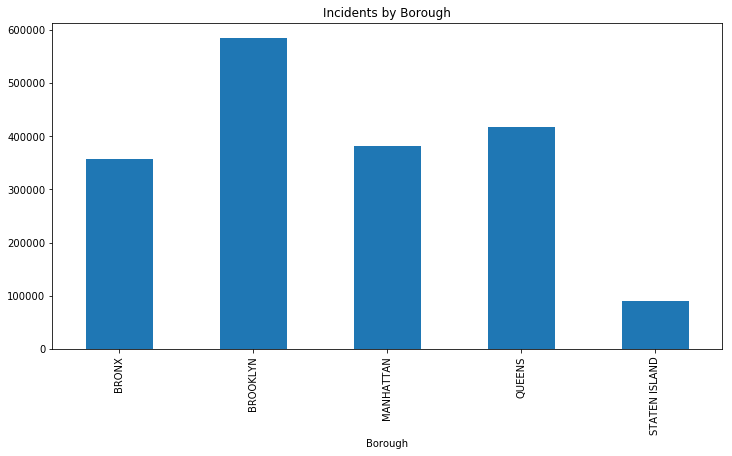

In [47]:
#Exploration of incidents by Borough
borough = df.groupby('Borough')
borough.size().plot(kind='bar', figsize=(12,6), title=('Incidents by Borough'));

#### From the graph, we can see that Brooklyn has the most incidents, while, Staten Island has the least. It should also be noted that Staten Island is the smallest of the five boroughs so that could be why it has the least incidents.

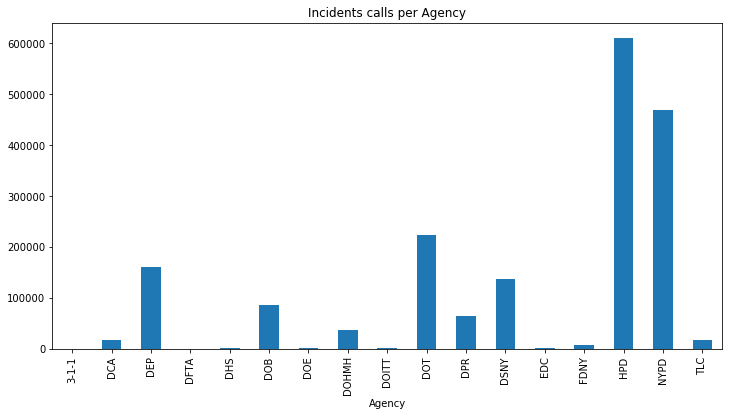

In [48]:
# Visualization of incidents by Agency
agency = df.groupby('Agency')
agency.size().plot(kind='bar', figsize=(12,6), title=('Incidents calls per Agency'));

#### HPD has the highest complaints followed by NYPD in Brooklyn

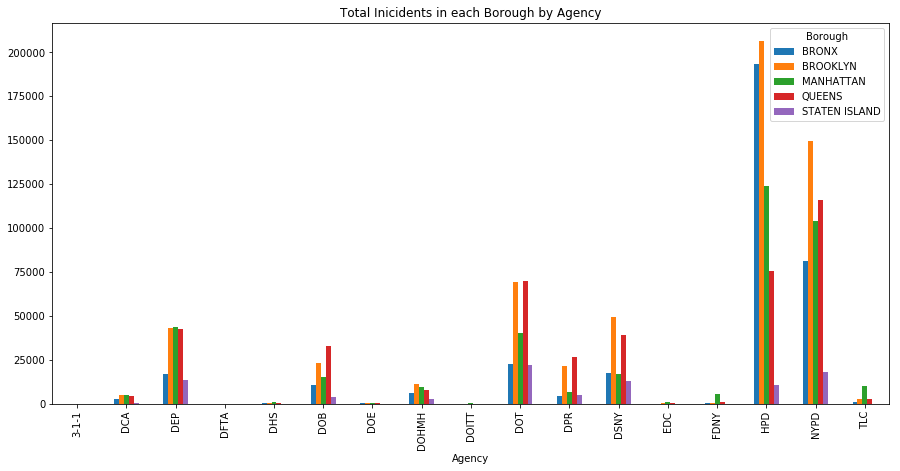

In [49]:
#Visualization of numnber of incidents in each Borough by Agency
agency_borough = df.groupby(['Agency','Borough']).size().unstack()
agency_borough.plot(kind='bar', title='Total Inicidents in each Borough by Agency', figsize=(15,7));

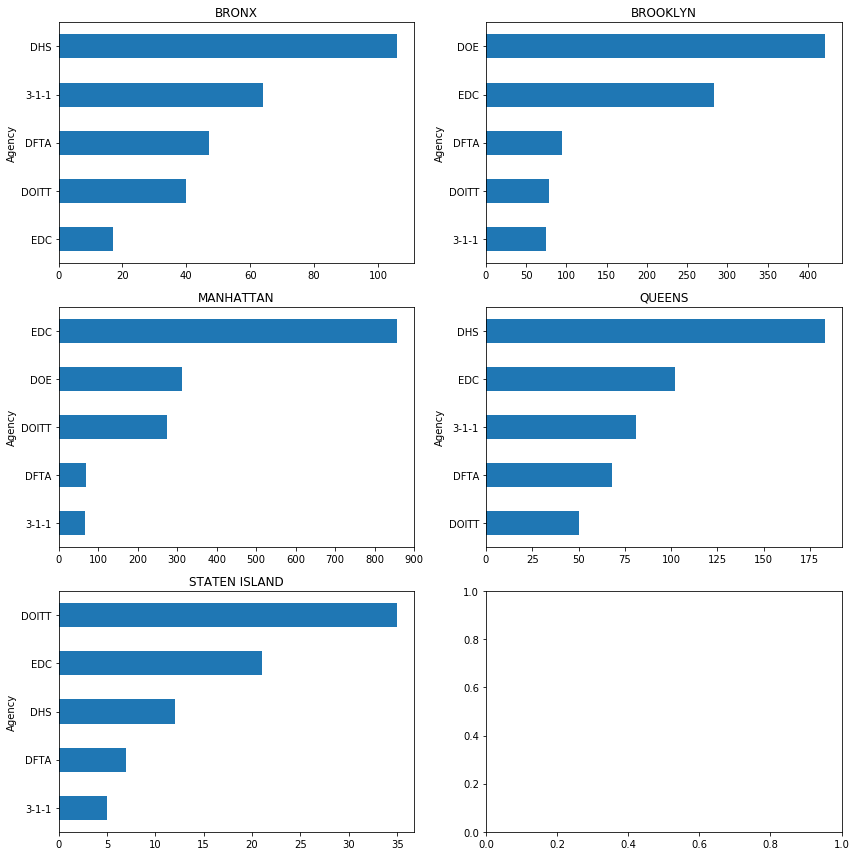

In [50]:
#Visualization of top Agencies with most incidents per borough
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(agency_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:5]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

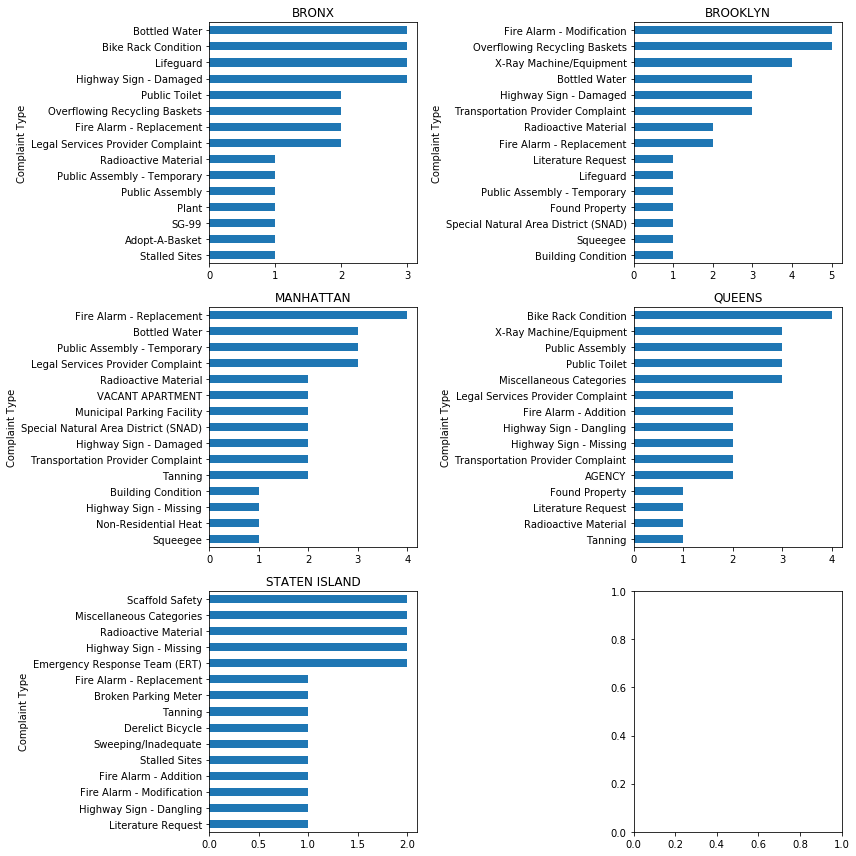

In [51]:
# Visualization of most Complaints per Borough
borough_comp = df.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

### Visualization on processing time.
#### The Processing Time in the dataframe is a datetime object, it is easier to convert the processing time into floats for calcuation

In [52]:
import numpy as np
df['Processing Time Float'] = df['Processing Time'].apply(lambda x:x/np.timedelta64(1, 'D'))

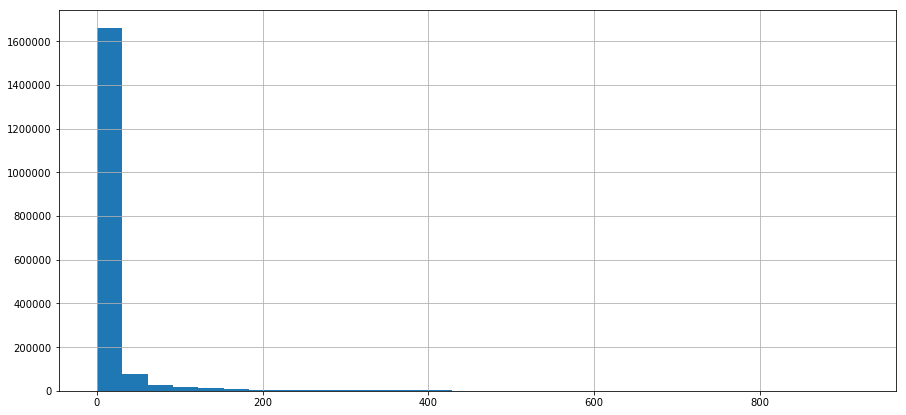

In [53]:
# Histogram of Processing Time
df['Processing Time Float'].hist(bins=30, figsize=(15,7));

### Since datetime objects occurs in the dataframe, I can build a bar graph to show Incidents per month and other interesting informtation. This would allow easy discovery of noticible trends and seasonality.

#### I can do this by adding a column to the data to keep track of year and months only

In [54]:
import datetime
df['YYYY-MM'] = df['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

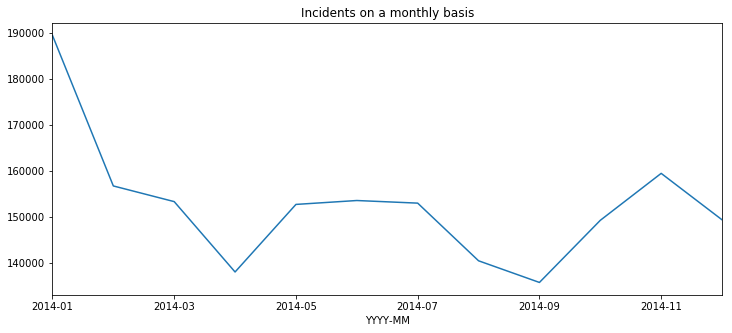

In [55]:
#Incidents on a monthly basis
monthly_incidents =  df.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');

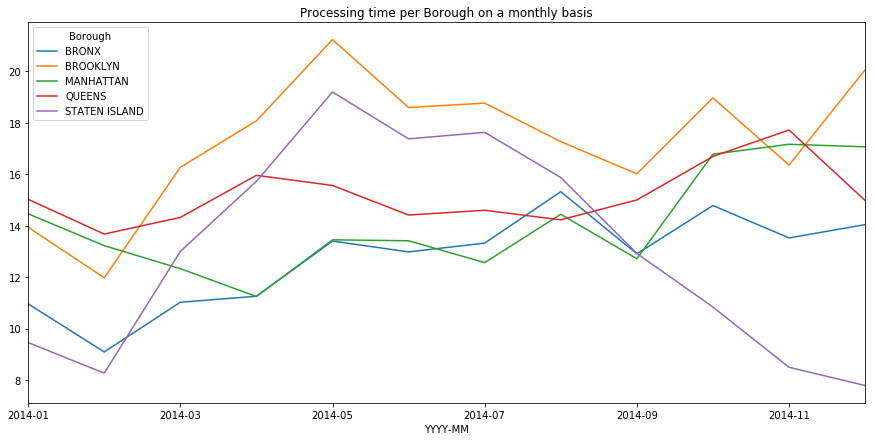

In [56]:
# Boroughs with Processing Time on a monthly basis
df.groupby(['YYYY-MM','Borough'])['Processing Time Float'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

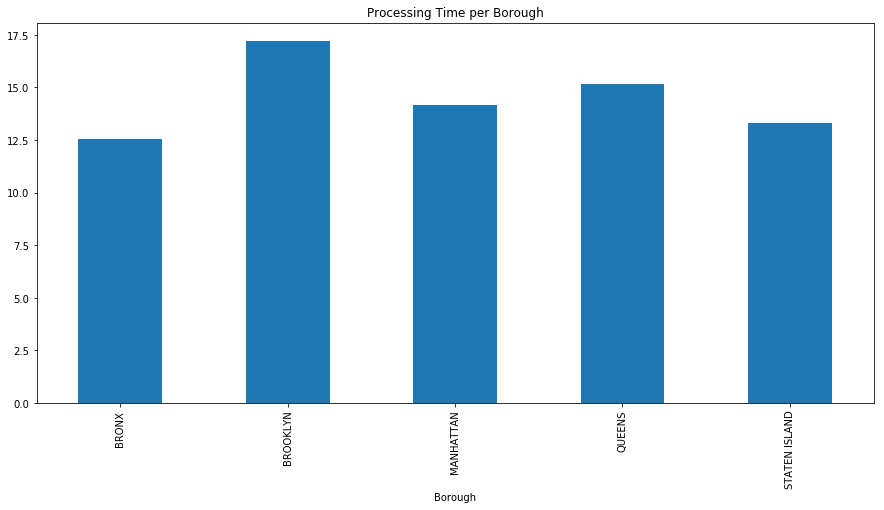

In [57]:
# Processing time per Borough
df.groupby('Borough')['Processing Time Float'].mean().plot(kind='bar', figsize=(15,7),
                                                          title='Processing Time per Borough');

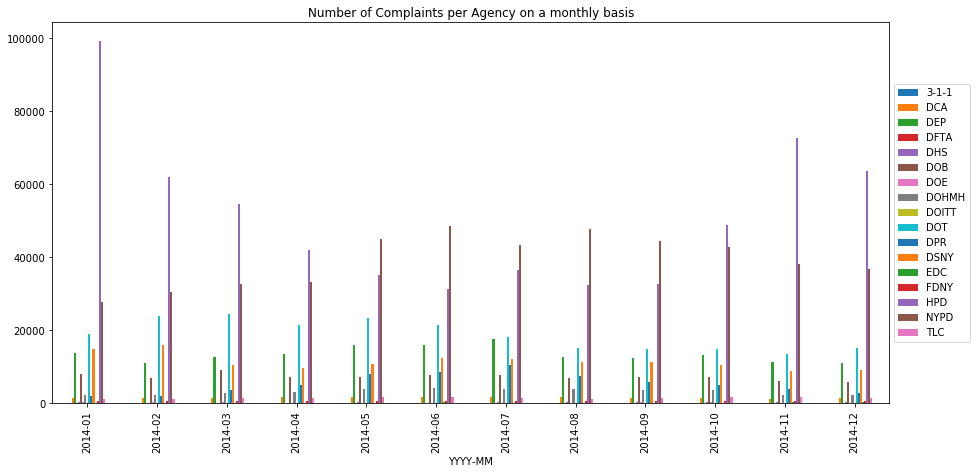

In [58]:
# Visulization of Number of Complaints per Agency on a monthly basis
date_agency = df.groupby(['YYYY-MM', 'Agency'])
date_agency.size().unstack().plot(kind='bar', figsize=(15,7), title='Number of Complaints per Agency on a monthly basis');
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

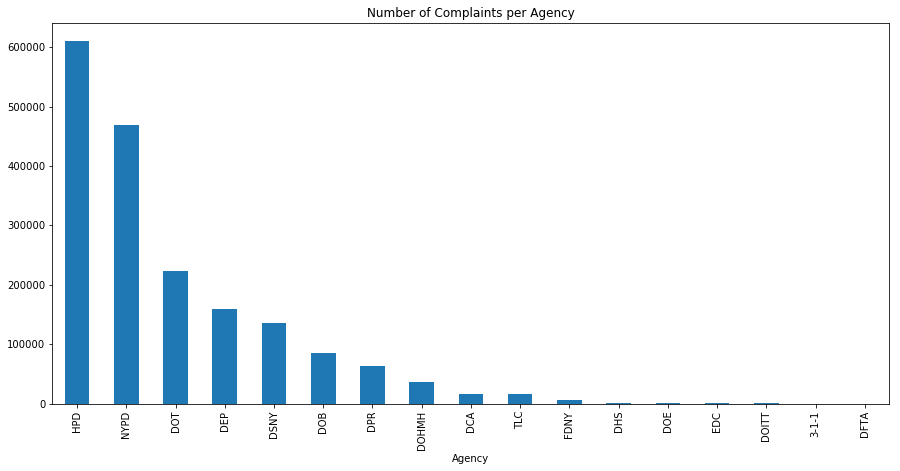

In [59]:
# Visualization of Agency with their number of Complaints
df.groupby('Agency').size().sort_values(ascending=False).plot(kind='bar',figsize=(15,7),
                                                             title='Number of Complaints per Agency');

#### Since HPD has the most complaints, I'll explore data relating to HPD to learn more about complaints handled by HPD

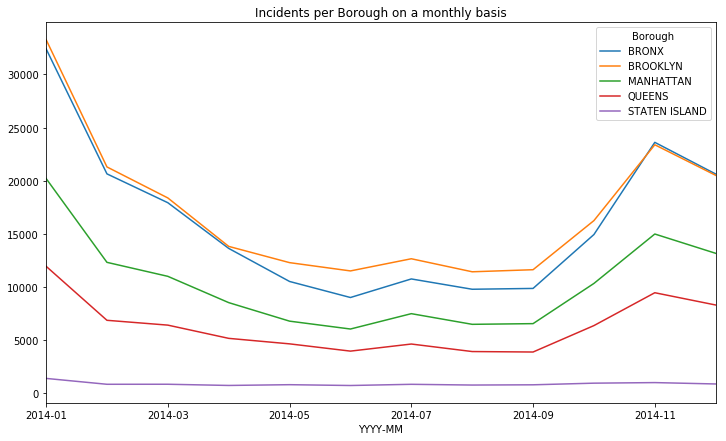

In [60]:
# Visualization of Incidents handled by HPD by Borough on a monthly basis
df[df['Agency']=='HPD'].groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(12,7),
                                                                            title='Incidents per Borough on a monthly basis');

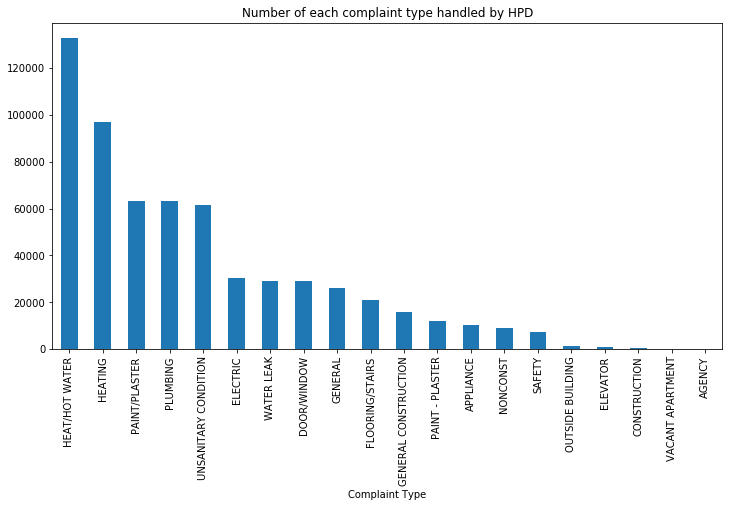

In [61]:
# Visualizations of Complaints handled by HPD
df[df['Agency']=='HPD'].groupby('Complaint Type').size().sort_values(ascending=False).plot(kind='bar',
                                                                                          figsize=(12,6),
                                                                        title='Number of each complaint type handled by HPD');

### Visualizations of Complaint Type

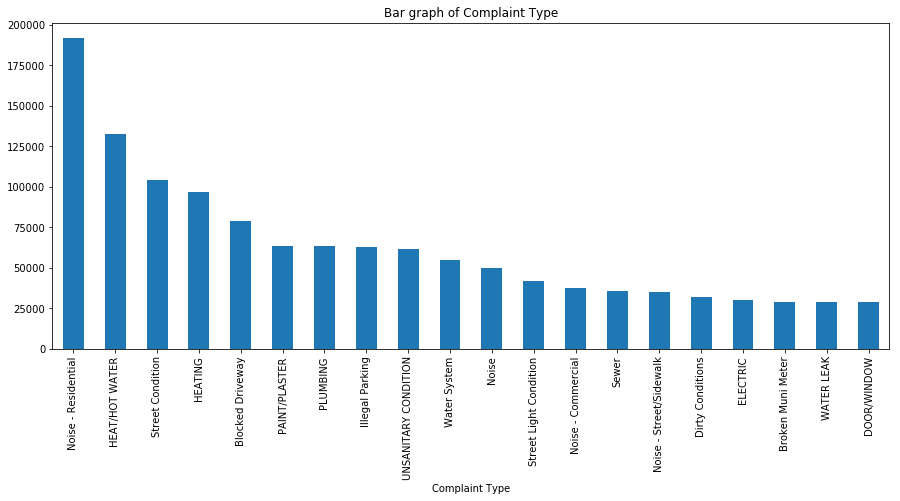

In [62]:
# Visualization of number of complaint type
df.groupby('Complaint Type').size().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,6),
                                                                          title='Bar graph of Complaint Type');

#### Noise - Residential has the most complaints, lets explore it further 

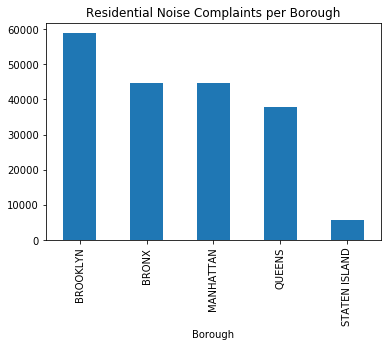

In [63]:
# Borough with the most Noise Complaints - Residential
df[df['Complaint Type']=='Noise - Residential'].groupby('Borough').size()[:10].sort_values(ascending=False).plot(kind='bar',
                                                                            title='Residential Noise Complaints per Borough');

#### Brooklyn has the most noise complaints for residential, it would be interesting to know if this noise peaked anytime within the year of if its uniform through the year

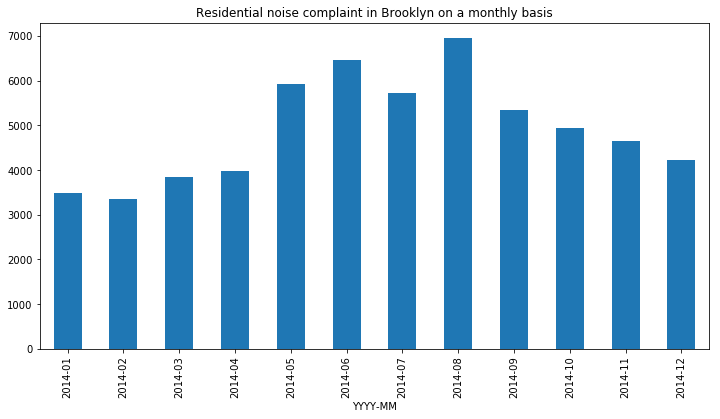

In [64]:
brooklyn_noise = df[(df['Borough']=='BROOKLYN') & (df['Complaint Type']=='Noise - Residential')]
brooklyn_noise.groupby('YYYY-MM').size().plot(kind='bar', figsize=(12,6),
                                             title='Residential noise complaint in Brooklyn on a monthly basis');

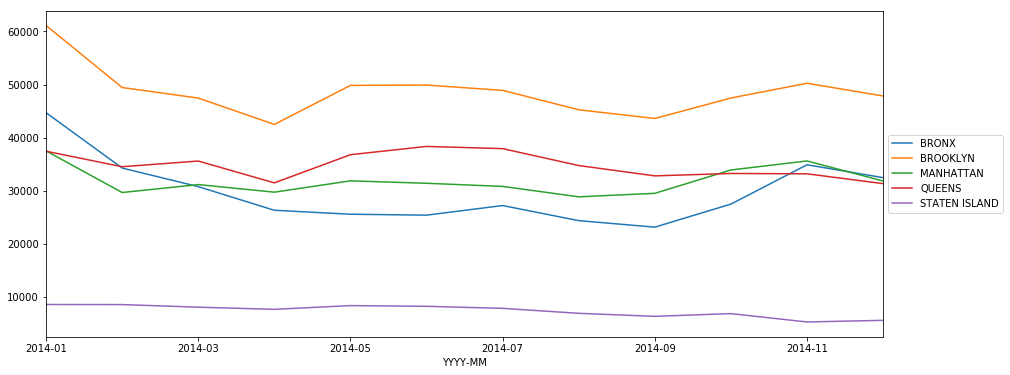

In [65]:
# Complaints per Borough through the year
df.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

<h2>Observations</h2>
<br>
<li>Brooklyn has the highest the number of incident calls followed by Queens. Staten Island has the least incident calls.</li>
<li>HPD has the most incident calls follwed by NYPD.</li>
<li>Majority of incidents occur in January followed by November and then the incident calls dips to its lowest in September followed by April.</li>
<li>HPD related incident calls follow a nearly regular pattern across all boroughs from month to month. Heat/Hot water complaints are the most frequent </li>
<li>Noise in residential areas were the most complaints in 2014 followed by Heat/Hot water complaints</li>
<li>Noise complaints were peaked in September and was lowest in February</li>
<br>

<h2>Conclusion</h2>
<p>Brooklyn has on average the slowest processing from month to month and this caould be associated with the fact that it has the highest number of incident calls, but it should be noted that while Staten Island has by far the lowest incident calls, it doesn't have the fastest processing time. Further analysis should be carried out to understand the variances in processing time
</p>
<p>Incident calls spike during winter period, during this same period, HPD related incidents spike. This can be explained by the fact that people are complaining about heat or hot water related problems
</p>
<p>More data from other years are required to know whether a trend does exist in number of monthly incident complaints and in the type of complaints. If a trend does exist, city officials would need to employ more agents during those periods to resolve complaints faster. In addition, during winter periods, city officials should ensure heating systems work so as to reduce heating related complaints
</p>